In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import os
import tqdm
import random
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")


2025-07-12 15:49:02.598827: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-12 15:49:02.607347: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-12 15:49:02.700191: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-12 15:49:02.809337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752315542.908808    8665 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752315542.93

## Create Dataframe for Input and Output

In [6]:
data_path = []
label = []

imgs_path = Path.cwd().parent / "data" 

print(f"Images path: {imgs_path}")

for pet in os.listdir(imgs_path):
    for img in tqdm.tqdm(os.listdir(imgs_path / pet)):
        if pet == "Cat":
            data_path.append(str(imgs_path / pet / img))
            label.append(0)
        else:
            data_path.append(str(imgs_path / pet / img))
            label.append(1)
print(f"Total number of images: {len(data_path)}")
print(f"Total number of images: {len(label)}")


Images path: /home/kavin/career/me/github/kkr-gen-ai-internship/cats-and-dogs-classification/data


  0%|          | 0/12499 [00:00<?, ?it/s]

100%|██████████| 12499/12499 [00:00<00:00, 82236.09it/s]

Total number of images: 24998
Total number of images: 24998


In [7]:
for i in range(5):
    print(f"{i+1}. {data_path[i]}: {label[i]}")

1. /home/kavin/career/me/github/kkr-gen-ai-internship/cats-and-dogs-classification/data/Dog/6854.jpg: 1
2. /home/kavin/career/me/github/kkr-gen-ai-internship/cats-and-dogs-classification/data/Dog/4352.jpg: 1
3. /home/kavin/career/me/github/kkr-gen-ai-internship/cats-and-dogs-classification/data/Dog/10451.jpg: 1
4. /home/kavin/career/me/github/kkr-gen-ai-internship/cats-and-dogs-classification/data/Dog/474.jpg: 1
5. /home/kavin/career/me/github/kkr-gen-ai-internship/cats-and-dogs-classification/data/Dog/8417.jpg: 1


In [8]:
df = pd.DataFrame()
df["data_path"] = data_path
df["label"] = label

In [9]:
df['label'] = df['label'].astype('str')
df.head()

,data_path,label
0,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
1,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
2,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
3,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
4,/home/kavin/career/me/github/kkr-gen-ai-intern...,1


In [10]:
df = df.sample(frac=1).reset_index(drop=True)# Shuffle the DataFrame
df.head()


,data_path,label
0,/home/kavin/career/me/github/kkr-gen-ai-intern...,0
1,/home/kavin/career/me/github/kkr-gen-ai-intern...,0
2,/home/kavin/career/me/github/kkr-gen-ai-intern...,0
3,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
4,/home/kavin/career/me/github/kkr-gen-ai-intern...,1


In [11]:
for i in df['data_path']:
    if ".jpg" not in i:
        print(i)

## Exploratory Data Analysis

In [12]:
plt.figure(figsize=(25,25))
dog_imgs = df[df["label"] == 1]["data_path"]
start = random.randint(0, len(dog_imgs))
files = dog_imgs[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("dogs")
    plt.axis("off")

<Figure size 2500x2500 with 0 Axes>

In [13]:
plt.figure(figsize=(25,25))
cat_imgs = df[df["label"] == 0]["data_path"]
start = random.randint(0, len(cat_imgs))
files = cat_imgs[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("dogs")
    plt.axis("off")

<Figure size 2500x2500 with 0 Axes>

<Axes: xlabel='label', ylabel='count'>

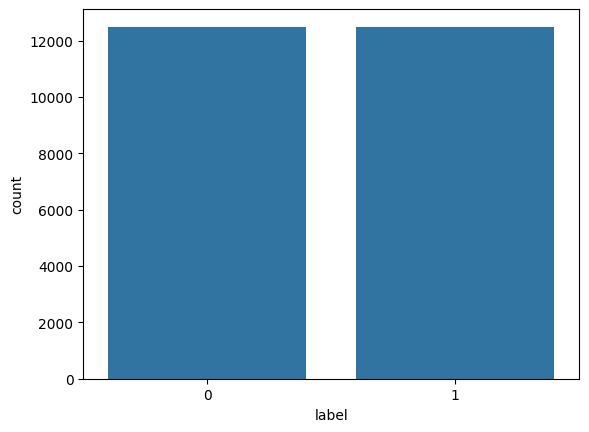

In [14]:
sns.countplot(x="label", data=df)

In [15]:
# Data splitting
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
train.head()

,data_path,label
23286,/home/kavin/career/me/github/kkr-gen-ai-intern...,0
17781,/home/kavin/career/me/github/kkr-gen-ai-intern...,0
1020,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
12644,/home/kavin/career/me/github/kkr-gen-ai-intern...,0
1533,/home/kavin/career/me/github/kkr-gen-ai-intern...,1


In [17]:
test.head()

,data_path,label
6868,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
22910,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
9668,/home/kavin/career/me/github/kkr-gen-ai-intern...,0
13638,/home/kavin/career/me/github/kkr-gen-ai-intern...,1
23337,/home/kavin/career/me/github/kkr-gen-ai-intern...,1


## Create Data Generator for the Images

In [18]:

train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0, 1]
    rotation_range=40,          # Augment images by rotating them to avoid overfitting
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_iterator = train_datagenerator.flow_from_dataframe(
    dataframe=train,
    directory=None,             # Since data_path contains full paths, we set directory to None
    x_col='data_path',
    y_col='label',
    target_size=(128, 128),     # Resize images to 150x150 pixels
    batch_size=512,
    class_mode='binary'         # Binary classification (cats vs dogs)
)   

val_iterator = val_generator.flow_from_dataframe(
    dataframe=test,
    directory=None,             # Since data_path contains full paths, we set directory to None
    x_col='data_path',
    y_col='label',
    target_size=(128, 128),     # Resize images to 150x150 pixels
    batch_size=512,
    class_mode='binary'         # Binary classification (cats vs dogs)
)   

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [19]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

E0000 00:00:1752315574.535061    8665 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1752315574.536069    8665 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    train_iterator,
    steps_per_epoch=len(train_iterator),
    epochs=50,
    validation_data=val_iterator,  # You can add validation data if available
)

Epoch 1/50


2025-07-12 15:49:53.259500: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 100665344 bytes after encountering the first element of size 100665344 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


40/40 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5080 - loss: 0.7076 - val_accuracy: 0.5040 - val_loss: 0.6882
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5584 - loss: 0.6831 - val_accuracy: 0.5870 - val_loss: 0.6596
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.6163 - loss: 0.6498 - val_accuracy: 0.6432 - val_loss: 0.6154
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6600 - loss: 0.6110 - val_accuracy: 0.7024 - val_loss: 0.5637
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6908 - loss: 0.5796 - val_accuracy: 0.7062 - val_loss: 0.5617
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7008 - loss: 0.5696 - val_accuracy: 0.7492 - val_loss: 0.5093
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7135 - loss: 0.5546 - val_accuracy: 0.7530 - val_loss: 0.5078
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7211 - loss: 0.5399 - val_accuracy: 0.7728 - val_loss: 0.4931
Epo

## Save the model

In [22]:
model.save('../src/model_50.keras')

## Results

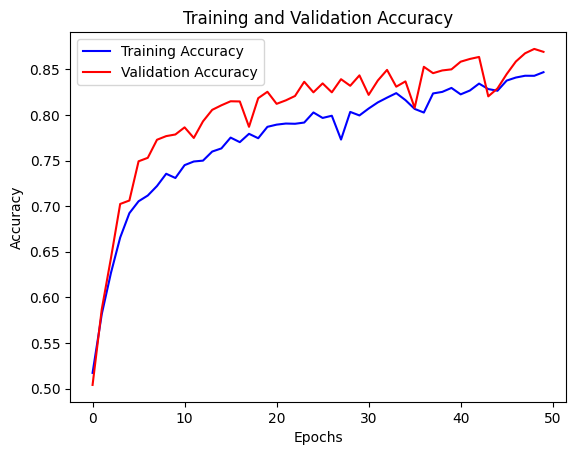

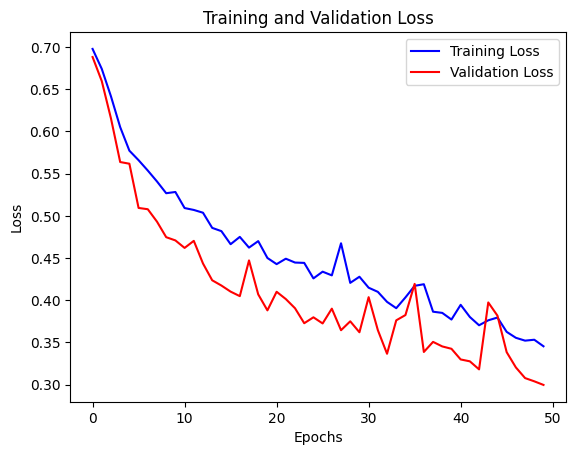

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()